In [121]:
import xarray as xr
import rioxarray as rio
# import dask
# import datacube

import matplotlib.pyplot as plt
from dask.distributed import Client

%matplotlib inline

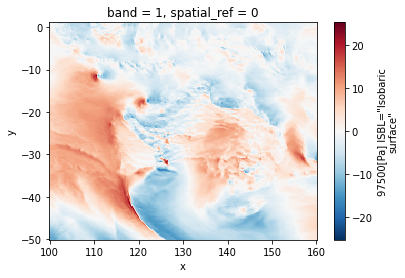

In [4]:
rr = rio.open_rasterio("/home/rvalavi/Downloads/gfs_vgrd_20220301_t00z_f010")
rr.plot()

In [5]:
rr

<xarray.DataArray (band: 1, y: 205, x: 241)>
array([[[ -0.123945,  -1.033945, ...,  -1.103945,  -0.693945],
        [  0.316055,   0.206055, ...,  -0.833945,  -0.413945],
        ...,
        [-12.993945, -12.783945, ...,   3.166055,   3.356055],
        [-13.023945, -12.773945, ...,   3.266055,   3.466055]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 159.2 159.5 159.8 160.0
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -49.25 -49.5 -49.75 -50.0
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               36000 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 10 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 10 100 0 0 ...
    GRIB_REF_TIME:                       1646092800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1646128800 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

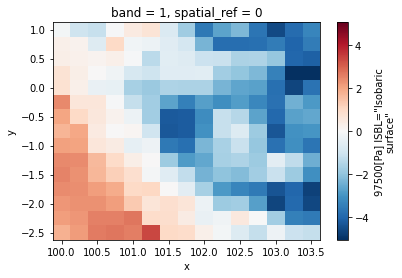

In [11]:
# cells = [i + 1 for i in range(15)]
r = rr.isel(x = range(15), y = range(15))
r.plot()

In [8]:
r

<xarray.DataArray (band: 1, y: 15, x: 15)>
array([[[-0.123945, -1.033945, ..., -3.883945, -3.353945],
        [ 0.316055,  0.206055, ..., -4.063945, -3.523945],
        ...,
        [ 2.126055,  2.246055, ..., -3.453945, -3.593945],
        [ 1.786055,  2.156055, ..., -1.103945, -1.193945]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 102.8 103.0 103.2 103.5
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -1.75 -2.0 -2.25 -2.5
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               36000 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 10 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 10 100 0 0 ...
    GRIB_REF_TIME:                       1646092800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1646128800 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

In [9]:
r.values.shape

(1, 15, 15)

In [10]:
r.values[0, 2, [2, 3, 4]]

array([ 0.18605468,  0.30605468, -0.07394531])

In [17]:
# read multiple files
path = "/home/rvalavi/Downloads/GFSdata/"
li = os.listdir(path)
files = [os.path.join(path, i) for i in li]

files[0:3]

['/home/rvalavi/Downloads/GFSdata/gfs_vgrd_20220505_t00z_f003',
 '/home/rvalavi/Downloads/GFSdata/gfs_ugrd_20220505_t00z_f000',
 '/home/rvalavi/Downloads/GFSdata/gfs_ugrd_20220505_t00z_f007']

In [112]:
li = []
for i in files:
    li.append(rio.open_rasterio(i))

rr = xr.concat(li, dim = "band")

In [188]:
import rioxarray as rio
from datetime import datetime
import os

# read wind data and keep their information
def read_wind(path):
    files = os.listdir(path)
    rlist = []
    for i in files:
        name = os.path.join(path, i)
        _, comp, date, time, fcst = i.split("_")
        r = rio.open_rasterio(name).assign_coords(
            {'date': datetime(int(date[0:4]), int(date[4:6]), int(date[6:8])),
            'time':  str(time),
            'Component': str(comp),
            'Forecast': str(fcst)}
        )
        rlist.append(r)
    stack = xr.concat(rlist, dim = "band")
    return stack


In [189]:
rr = read_wind(path = "/home/rvalavi/Downloads/GFSdata/")
rr

<xarray.DataArray (band: 20, y: 205, x: 241)>
array([[[-6.04025841e-01,  1.35974124e-01,  8.65974128e-01, ...,
          1.45974115e-01,  4.55974102e-01,  8.35974097e-01],
        [ 1.35974124e-01, -2.64025867e-01,  7.59741217e-02, ...,
          6.45974100e-01,  8.65974128e-01,  1.15597415e+00],
        [ 1.28597414e+00,  2.59741209e-02, -3.14025879e-01, ...,
          3.95974100e-01,  6.05974078e-01,  1.02597415e+00],
        ...,
        [ 4.67597389e+00,  4.36597395e+00,  4.04597425e+00, ...,
          4.77597380e+00,  3.57597399e+00,  2.54597402e+00],
        [ 4.59597397e+00,  4.31597424e+00,  3.72597408e+00, ...,
          6.74597406e+00,  5.58597422e+00,  4.12597418e+00],
        [ 4.31597424e+00,  3.93597412e+00,  3.52597404e+00, ...,
          6.09597397e+00,  6.35597420e+00,  5.93597412e+00]],

       [[ 1.75665274e-01, -2.84334719e-01, -1.43433464e+00, ...,
         -6.64433479e+00, -6.59433460e+00, -6.18433475e+00],
        [ 8.25665236e-01,  6.45665288e-01, -3.44334722e-01, ...,
         -6.53433466e+00, -6.38433456e+00, -6.22433472e+00],
        [ 8.35665286e-01,  6.75665259e-01,  5.65665245e-01, ...,
         -6.31433439e+00, -6.14433479e+00, -6.26433468e+00],
...
        [ 6.17176723e+00,  6.02176762e+00,  5.91176748e+00, ...,
          6.87176752e+00,  6.89176750e+00,  6.69176722e+00],
        [ 6.23176765e+00,  5.94176722e+00,  5.66176748e+00, ...,
          5.88176727e+00,  6.36176729e+00,  6.65176725e+00],
        [ 6.49176741e+00,  6.14176750e+00,  5.67176723e+00, ...,
          5.27176762e+00,  5.45176744e+00,  5.68176746e+00]],

       [[ 1.17997062e+00,  7.99707025e-02,  1.59970701e-01, ...,
          2.43997073e+00,  2.37997055e+00,  2.20997071e+00],
        [ 5.29970706e-01, -3.60029280e-01,  6.99707046e-02, ...,
          2.36997056e+00,  2.14997077e+00,  2.10997057e+00],
        [ 1.04997063e+00,  9.99970675e-01,  1.22997069e+00, ...,
          1.92997062e+00,  2.00997066e+00,  2.47997069e+00],
        ...,
        [ 7.19997072e+00,  7.44997072e+00,  7.89997053e+00, ...,
          4.92997074e+00,  5.01997042e+00,  5.22997046e+00],
        [ 7.57997036e+00,  7.42997074e+00,  7.38997030e+00, ...,
          3.94997072e+00,  4.11997080e+00,  4.18997049e+00],
        [ 8.58997059e+00,  8.15997028e+00,  7.80997038e+00, ...,
          3.49997067e+00,  3.46997070e+00,  3.44997072e+00]]])
Coordinates:
  * band         (band) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 159.2 159.5 159.8 160.0
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -49.25 -49.5 -49.75 -50.0
    spatial_ref  int64 0
    date         datetime64[ns] 2022-05-05
    time         <U4 't00z'
    Component    (band) <U4 'vgrd' 'ugrd' 'ugrd' 'ugrd' ... 'vgrd' 'vgrd' 'vgrd'
    Forecast     (band) <U4 'f003' 'f000' 'f007' 'f009' ... 'f004' 'f005' 'f008'
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               10800 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 3 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 3 100 0 0 1...
    GRIB_REF_TIME:                       1651708800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1651719600 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

In [190]:
rr.Component

<xarray.DataArray 'Component' (band: 20)>
array(['vgrd', 'ugrd', 'ugrd', 'ugrd', 'ugrd', 'vgrd', 'ugrd', 'ugrd',
       'vgrd', 'vgrd', 'vgrd', 'vgrd', 'vgrd', 'ugrd', 'ugrd', 'ugrd',
       'ugrd', 'vgrd', 'vgrd', 'vgrd'], dtype='<U4')
Coordinates:
  * band         (band) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    spatial_ref  int64 0
    date         datetime64[ns] 2022-05-05
    time         <U4 't00z'
    Component    (band) <U4 'vgrd' 'ugrd' 'ugrd' 'ugrd' ... 'vgrd' 'vgrd' 'vgrd'
    Forecast     (band) <U4 'f003' 'f000' 'f007' 'f009' ... 'f004' 'f005' 'f008'

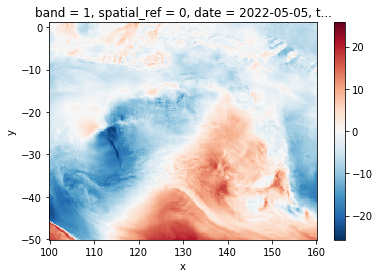

In [192]:
(rr[0] + rr[1]).plot()

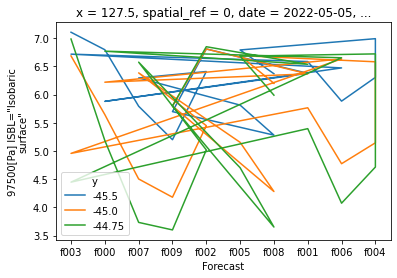

In [197]:
rr.isel(x=110, y=[-19, -21, -22]).plot.line(x="Forecast")